# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations and seed it to 600
np.random.seed(600)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

## Do API call

In [3]:
# base URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Create endpoint URL with API key
query_url = f"{url}&appid={weather_api_key}&units={units}&q="

# empty lists to store our values
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
country_id = []

# Create counters
counter_record = 0
counter_set = 0

# Loop through all the cities in our list
for city in cities:

    # Create endpoint URL with each city and parse the JSON and retrieve data
    weather_resp = requests.get(query_url + city).json()

    # Group cities in sets of 50 for logging purposes
    if counter_record < 50:
       counter_record = counter_record
    else:
        counter_set+=1
        counter_record = 0

    # Run an API request for each of the cities
    try:
        # Append the City information into appropriate list
        city_name.append(weather_resp['name'])
        lat.append(weather_resp['coord']['lat'])
        lng.append(weather_resp['coord']['lon'])
        max_temp.append(weather_resp['main']['temp_max'])
        humidity.append(weather_resp['main']['humidity'])
        cloudiness.append(weather_resp['clouds']['all'])
        wind_speed.append(weather_resp['wind']['speed'])
        date.append(weather_resp['dt'])
        country_id.append(weather_resp['sys']['country'][:])

        # Log the url, record, and set numbers
        print(f"Processing Record {counter_record} of set {counter_set} | {city}")

        # Add 1 to the record count
        counter_record+=1

    # handle errors by skipping city
    except (KeyError, IndexError):
        print("City not found. Skipping...")

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 0 of set 0 | albany
Processing Record 1 of set 0 | kavieng
Processing Record 2 of set 0 | flin flon
Processing Record 3 of set 0 | ushuaia
Processing Record 4 of set 0 | broome
Processing Record 5 of set 0 | busselton
City not found. Skipping...
Processing Record 6 of set 0 | vaini
Processing Record 7 of set 0 | kaitangata
Processing Record 8 of set 0 | bluff
Processing Record 9 of set 0 | souillac
Processing Record 10 of set 0 | college
Processing Record 11 of set 0 | rio gallegos
City not found. Skipping...
Processing Record 12 of set 0 | upernavik
Processing Record 13 of set 0 | dikson
Processing Record 14 of set 0 | bredasdorp
Processing Record 15 of set 0 | rikitea
Processing Record 16 of set 0 | aberdeen
Processing Record 17 of set 0 | barrow
Processing Record 18 of set 0 | wucheng
Processing Record 19 of set 0 | castro
Processing Record 20 of set 0 | puerto escondido
Processing Record 21 of set 0 | hobart
Processing Record 22 of set 0 | new norfolk
City not fou

In [4]:
# Convert lists into Pandas DataFrame
weather_data_df = pd.DataFrame({'City': city_name, 'Lat': lat, 'Long': lng, 'Max Temp': max_temp, 'Humidity': humidity, 'Cloudiness': cloudiness, 'Wind Speed': wind_speed, 'Country': country_id, 'Date': date})

# Show Record Count
weather_data_df.count()

City          545
Lat           545
Long          545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [5]:
# Display the Weather Data Frame
weather_data_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,24.01,54,43,8.01,US,1612750036
1,Kavieng,-2.5744,150.7967,85.01,70,26,7.87,PG,1612749550
2,Flin Flon,54.7682,-101.8650,-29.85,81,24,10.31,CA,1612749588
3,Ushuaia,-54.8000,-68.3000,50.00,81,75,4.61,AR,1612750137
4,Broome,42.2506,-75.8330,14.00,62,75,11.50,US,1612750089


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_data_df.describe()

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,19.176986,17.858423,48.405046,73.433028,52.853211,8.379303,1.612750e+09
std,34.238044,92.534898,32.492596,18.846019,41.018922,5.696060,1.664417e+02
min,-54.800000,-175.200000,-36.510000,1.000000,0.000000,0.400000,1.612749e+09
25%,-10.616700,-66.825400,25.810000,64.000000,2.000000,4.000000,1.612750e+09
50%,21.444700,21.286900,60.800000,78.000000,62.000000,6.910000,1.612750e+09
75%,49.670800,102.500000,75.020000,87.000000,96.000000,11.500000,1.612750e+09
max,78.218600,179.316700,93.990000,100.000000,100.000000,42.570000,1.612750e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
dirty_weather_data = weather_data_df[(weather_data_df["Humidity"] > 100)].index
                                  
dirty_weather_data

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the weather data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the weather_data DataFrame, which we call "clean_weather_data".
clean_weather_data = weather_data_df.drop(dirty_weather_data, inplace=False)

# store to a csv file for use in part two
clean_weather_data.to_csv(output_data_file, index=False)

# show data frame
clean_weather_data.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,24.01,54,43,8.01,US,1612750036
1,Kavieng,-2.5744,150.7967,85.01,70,26,7.87,PG,1612749550
2,Flin Flon,54.7682,-101.8650,-29.85,81,24,10.31,CA,1612749588
3,Ushuaia,-54.8000,-68.3000,50.00,81,75,4.61,AR,1612750137
4,Broome,42.2506,-75.8330,14.00,62,75,11.50,US,1612750089


## Plotting the Data Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.


## Latitude vs. Temperature Plot

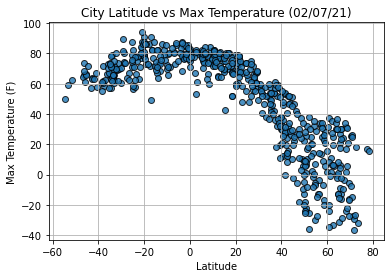

In [9]:
# set x and y axis values
lats = clean_weather_data['Lat']
max_temp = clean_weather_data['Max Temp']

# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temp,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities"         
            )

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature (%s)'% time.strftime("%m/%d/%y"))
plt.grid()

# save figure
plt.savefig("output_data/fig1.png")

# show plot
plt.show()

Above plot is a good representation of latitude on temperature. the temperature is rising higher as we move close to the equator'0 latitude' as should be.

## Latitude vs Humidity Plot

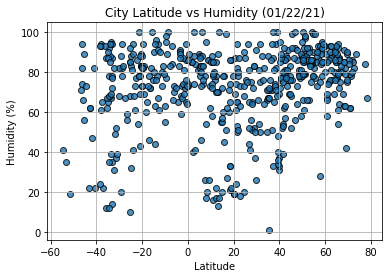

In [15]:
# set x and y axis values
lats = clean_weather_data['Lat']
humidity = clean_weather_data['Humidity']

# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities"                      
            )

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (%s)'% time.strftime("%m/%d/%y"))
plt.grid()

# Save the figure
plt.savefig("output_data/fig2.png")

# Show plot
plt.show()

## Latitude vs Cloudiness Plot

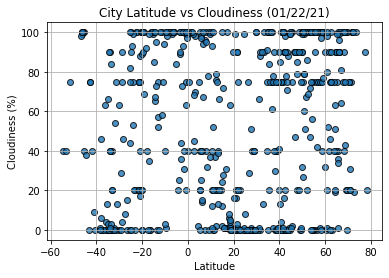

In [16]:
# set up x and y axis
lats = clean_weather_data['Lat']
cloudiness = clean_weather_data['Cloudiness']

# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities"           
            )

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (%s)'% time.strftime("%m/%d/%y"))
plt.grid()

# save figure
plt.savefig("output_data/fig3.png")

# show plot
plt.show()

## Latitude vs Wind Speed Plot

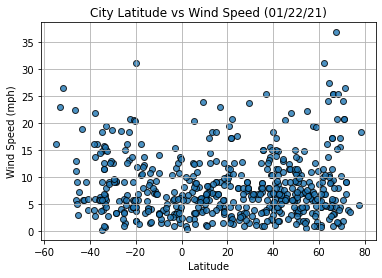

In [17]:
# set up x and y axis values
lats = clean_weather_data['Lat']
wind_speed = clean_weather_data['Wind Speed']

# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities"            
            )

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (%s)'% time.strftime("%m/%d/%y"))
plt.grid()

# save figure
plt.savefig("output_data/fig4.png")

# show plot
plt.show()

## Linear Regression

In [23]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, title, text_coordinates):

    # Run regression and line equation
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values, 'r')
    plt.xlabel('Latitude')
    plt.ylabel(x_label)
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.title(title)
    print(f"R squared is: {rvalue**2}")
    print(line_eq)
    # plt.show()

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = clean_weather_data.loc[clean_weather_data["Lat"] >= 0]

southern_hemisphere_df = clean_weather_data.loc[clean_weather_data["Lat"] < 0]

In [17]:
# display data frames
southern_hemisphere_df.head(5)
northern_hemisphere_df.head(5)

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,24.01,54,43,8.01,US,1612750036
2,Flin Flon,54.7682,-101.8650,-29.85,81,24,10.31,CA,1612749588
4,Broome,42.2506,-75.8330,14.00,62,75,11.50,US,1612750089
10,College,64.8569,-147.8028,-13.00,83,20,3.89,US,1612750138
12,Upernavik,72.7868,-56.1549,18.30,78,2,3.58,GL,1612750138


## Max Temp vs. Latitude Linear Regression

R squared is: 0.7320859262740624
y = -1.37x + 90.06


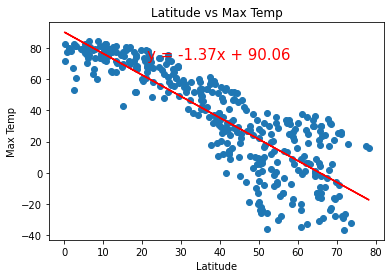

In [24]:
# Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', 'Latitude vs Max Temp', (21.32, 72.46))
# save figure
plt.savefig("output_data/fig5.png")

R squared is: 0.35329752049275204
y = 0.4x + 82.61


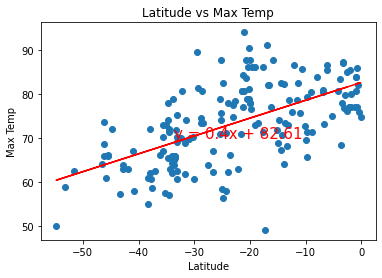

In [25]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp','Latitude vs Max Temp', (-33.65, 70.00))
# save figure
plt.savefig("output_data/fig6.png")

The high r value indicates a strong positive correlation between latitude and max temperature. R values ~ 0.5 indicate that there is a moderate positive correlation.

## Humidity (%) vs. Latitude Linear Regression

R squared is: 0.08929560457374722
y = 0.28x + 62.27


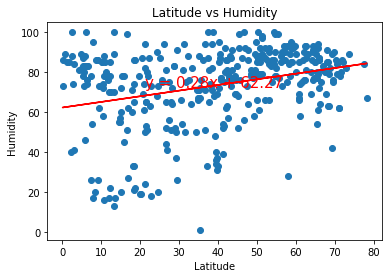

In [53]:
# Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity','Latitude vs Humidity', (21.32, 72.46))

R squared is: 0.08938786205821327
y = 0.46x + 82.22


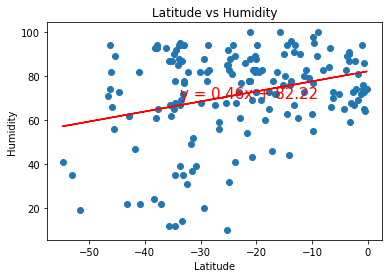

In [54]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity','Latitude vs Humidity', (-33.65, 70.00))

The low r values indicate a weak to no relationship between humidity and latitude.

## Cloudiness (%) vs. Latitude Linear Regression

R squared is: 0.06057387265349745
y = 0.48x + 35.51


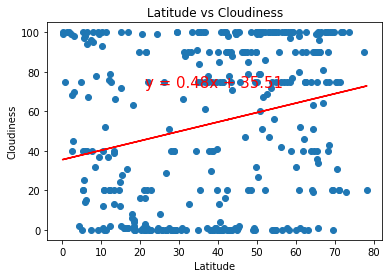

In [55]:
# Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness','Latitude vs Cloudiness', (21.32, 72.46))

R squared is: 0.13021969679891784
y = 1.09x + 76.61


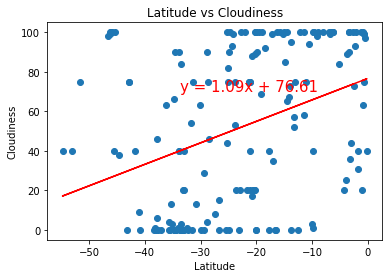

In [56]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness','Latitude vs Cloudiness', (-33.65, 70.00))

There is no clear pattern or trends to follow in these plot. convetional wisdom dectate that, more clouds and rains should form near the equator line. however our data is wildely scatterd. may be we need thoudand of data points to see a clear picture here. 

## Wind Speed (mph) vs. Latitude Linear Regression

R squared is: 0.018833671307468353
y = 0.04x + 6.7


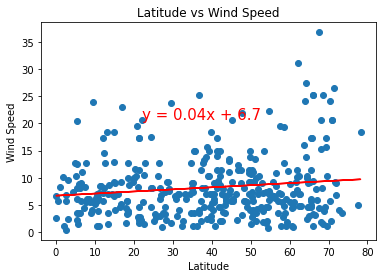

In [63]:
# Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed','Latitude vs Wind Speed', (22.07, 20.71))

R squared is: 0.08191404601035382
y = -0.12x + 5.5


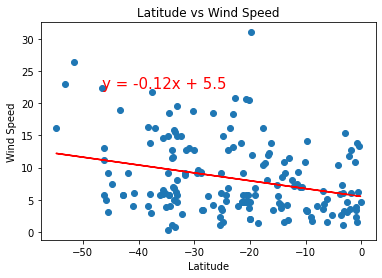

In [65]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed','Latitude vs Wind Speed', (-46.60, 22.37))

The low r values indicate that there is no real relationship between wind speed and latitude." The difference between the hemispheres doesn't seem to be significant enough to comment upon.